### import all the necessary libraries

In [1331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
from yellowbrick.classifier import ROCAUC, ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import re

### import the Data

In [1176]:
data_training = pd.read_csv('train.csv', sep=',',low_memory=False)
data_testing = pd.read_csv('test.csv',sep=',')

# Understanding the Structure of Data

In [1177]:
# display the first 5 rows from the data
data_training.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [1178]:
# display the last 5 rows from the data
data_training.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.6736955618808,Poor


In [1179]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

We notice that there are inconsistencies in the data types within certain columns. For example, the columns representing Age, Annual Income, and Monthly Balance are currently labeled as objects, which may lead to misinterpretation of their actual numerical values. This misclassification could potentially affect subsequent analyses or modeling processes.

In [1180]:
data_training.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


From this basic statistical information, it's apparent that there may be outliers in the dataset. This suspicion arises from the substantial differences between the mean and standard deviation in certain features, such as Total EMI per month, Interest Rate, and Number of Bank Accounts. Additionally, comparing the minimum and maximum values across features highlights significant gaps, further suggesting the presence of outliers in the data. Identifying and addressing these outliers may be crucial for ensuring the accuracy and reliability of subsequent analyses or modeling efforts.

# Handling Missing Values

- **Traning Data**

In [1181]:
null_columns = data_training.columns[data_training.isnull().any()]
round(data_training[null_columns].isnull().sum()/data_training.shape[0]*100,2)

Name                        9.98
Monthly_Inhand_Salary      15.00
Type_of_Loan               11.41
Num_of_Delayed_Payment      7.00
Num_Credit_Inquiries        1.96
Credit_History_Age          9.03
Amount_invested_monthly     4.48
Monthly_Balance             1.20
dtype: float64

- **Testing Data**

In [1182]:
null_columns = data_testing.columns[data_testing.isnull().any()]
round(data_testing[null_columns].isnull().sum()/data_testing.shape[0]*100,2)

Name                       10.03
Monthly_Inhand_Salary      15.00
Type_of_Loan               11.41
Num_of_Delayed_Payment      7.00
Num_Credit_Inquiries        2.07
Credit_History_Age          8.94
Amount_invested_monthly     4.54
Monthly_Balance             1.12
dtype: float64

In [1183]:
# calculat how much we going to loss if we drop the NaN values from all columns using dropna function
def we_loss(data):
    copy = data.copy()
    shape = copy.shape[0]
    copy.dropna(inplace=True)
    count = round(((shape - copy.shape[0]) / shape) * 100, 2)
    return count
loss = we_loss(data_training)
print(f"If we drop NaN values for all columns, we're going to lose {loss}% of the data.")

If we drop NaN values for all columns, we're going to lose 46.95% of the data.


In [1184]:
# calculat how much we going to loss if we drop the NaN values from all columns using dropna function in the test data
def we_loss(data):
    copy = data.copy()
    shape = copy.shape[0]
    copy.dropna(inplace=True)
    count = round(((shape - copy.shape[0]) / shape) * 100, 2)
    return count
loss = we_loss(data_testing)
print(f"If we drop NaN values for all columns, we're going to lose {loss}% of the data.")

If we drop NaN values for all columns, we're going to lose 47.08% of the data.


With 8 columns containing NaN values, dropping them directly could result in losing a significant portion of the data. Hence, a more prudent approach would be to handle these NaN values individually for each column by filling them with appropriate values.

**Name column**

In [1185]:
# sense we have 9% of massing value in the Name column we going to fill them with mode
data_training['Name'] = data_training['Name'].fillna(data_training['Name'].mode()[0])

# sense we have 10% of massing value in the Name column we going to fill them with mode
data_testing['Name'] = data_testing['Name'].fillna(data_testing['Name'].mode()[0])

**Monthly_Inhand_Salary**

we have 15% of missing value for Monthly_Inhand_Salary so the beter way is to impute the missing values based on average salaries for similar occupation positions 

In [1186]:
data_training['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [1187]:
occupation_traning = data_training['Occupation'].unique()

for occ in occupation_traning:
    mask = data_training['Occupation'] == occ
    mean_salary = data_training.loc[mask, 'Monthly_Inhand_Salary'].mean()
    data_training.loc[mask, 'Monthly_Inhand_Salary'] = data_training.loc[mask, 'Monthly_Inhand_Salary'].fillna(mean_salary)


In [1188]:
occupation_testing = data_testing['Occupation'].unique()

for occ in occupation_testing:
    mask = data_testing['Occupation'] == occ
    mean_salary = data_testing.loc[mask, 'Monthly_Inhand_Salary'].mean()
    data_testing.loc[mask, 'Monthly_Inhand_Salary'] = data_testing.loc[mask, 'Monthly_Inhand_Salary'].fillna(mean_salary)


**Type_of_Loan**

In [1189]:
data_training['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [1190]:
#calculat how much diferent Type_of_Loan we have
len(data_training['Type_of_Loan'].unique())

6261

In [1191]:
data_training['Type_of_Loan'].mode()

0    Not Specified
Name: Type_of_Loan, dtype: object

In [1192]:
data_testing['Type_of_Loan'].mode()

0    Not Specified
Name: Type_of_Loan, dtype: object

We have identified that 11% of the entries in the 'Type_of_Loan' column are missing. Given that there are 6261 unique values in this column, the most common value, which also represents the mode, is 'Not Specified'. Therefore, it is reasonable to fill the missing values in the 'Type_of_Loan' column with 'Not Specified' to maintain consistency and minimize data loss.

In [1193]:
data_training['Type_of_Loan'] = data_training['Type_of_Loan'].fillna('Not Specified')

# for testing data
data_testing['Type_of_Loan'] = data_testing['Type_of_Loan'].fillna('Not Specified')

**Num_of_Delayed_Payment**

We've observed that there are 7% missing values in the 'Num_of_Delayed_Payment' column. Additionally, it appears that this column is represented as an object datatype. Given this situation, we'll fill the missing values in this column with 0 to ensure data integrity and consistency.

In [1194]:
#data_training['Num_of_Delayed_Payment'].fillna(data_training['Num_of_Delayed_Payment'].mode()[0], inplace=True)
data_training.fillna({'Num_of_Delayed_Payment':data_training['Num_of_Delayed_Payment'].mode()[0]}, inplace=True)

#for testing data
data_testing.fillna({'Num_of_Delayed_Payment':data_testing['Num_of_Delayed_Payment'].mode()[0]}, inplace=True)

**Num_Credit_Inquiries**

we have almost 2% of missing value so we fill them with 0 only to kep the data and not los any information

In [1195]:
# we fill this column with 0
data_training.fillna({"Num_Credit_Inquiries":0},inplace=True)

#for testing data
data_testing.fillna({"Num_Credit_Inquiries":0},inplace=True)

**Credit_History_Age**

Since Credit_History_Age likely represents a str value, we can fill the missing values with the mode of the column, depending on the Occupation of the customers

In [1196]:
occupation = data_training['Occupation'].unique()

for occ in occupation:
    mask = data_training['Occupation'] == occ
    mean_salary = data_training.loc[mask, 'Credit_History_Age'].mode()[0]
    data_training.loc[mask, 'Credit_History_Age'] = data_training.loc[mask, 'Credit_History_Age'].fillna(mean_salary)


In [1197]:
# for testing data
occupation_testing = data_testing['Occupation'].unique()

for occ in occupation_testing:
    mask = data_testing['Occupation'] == occ
    mean_salary = data_testing.loc[mask, 'Credit_History_Age'].mode()[0]
    data_testing.loc[mask, 'Credit_History_Age'] = data_testing.loc[mask, 'Credit_History_Age'].fillna(mean_salary)


**Amount_invested_monthly**

fill this column with 0

In [1198]:
# we fill this column with 0
data_training.fillna({"Amount_invested_monthly":"0"},inplace=True)

# for testing data
data_testing.fillna({"Amount_invested_monthly":"0"},inplace=True)

**Monthly_Balance**

In [1199]:
# we fill this column with 0
data_training.fillna({"Monthly_Balance":"0"},inplace=True)

#for testing data
data_testing.fillna({"Monthly_Balance":"0"},inplace=True)

#### Check if we still have any missing values in the data

In [1200]:
null_columns = data_training.columns[data_training.isnull().any()]
round(data_training[null_columns].isnull().sum()/data_training.shape[0]*100,2)

Series([], dtype: float64)

In [1201]:
#check for testing data
null_columns = data_testing.columns[data_testing.isnull().any()]
round(data_testing[null_columns].isnull().sum()/data_testing.shape[0]*100,2)

Series([], dtype: float64)

# Data Cleaning

#### - **Check for duplicate**

In [1202]:
data_training[data_training.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [1203]:
# testing data
data_testing[data_training.duplicated()]

C:\Users\ismai\AppData\Local\Temp\ipykernel_14952\1326386498.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_testing[data_training.duplicated()]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


#### - **Data Type Conversion**

We have some columns that need to be converted to their original data types. For example, the Age column is currently represented as an object instead of an integer, and the annual income column is also in an incorrect format.

In [1204]:
non_numeric = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
                'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
def clean_and_convert(value):
    # Remove non-numeric characters except for the decimal point
    cleaned_value = re.sub(r'[^\d.]', '', str(value))
    # Convert the cleaned value to a floating-point number, handling non-finite values
    try:
        return float(cleaned_value)
    except ValueError:
        return np.nan  # Return NaN for non-finite values



In [1205]:
# Apply the function
for col in non_numeric:
    # Remove non-numeric characters and convert to floating-point numbers
    data_training[col] = data_training[col].apply(clean_and_convert)


In [1206]:
# for testing data
# Apply the function
for col in non_numeric:
    # Remove non-numeric characters and convert to floating-point numbers
    data_testing[col] = data_testing[col].apply(clean_and_convert)


In [1207]:
# Fill NaN values with 0 before converting to integers
data_training[non_numeric] = data_training[non_numeric].fillna(0)

# for testing data
data_training[non_numeric] = data_training[non_numeric].fillna(0)

In [1208]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [1209]:
# Convert the columns to integers
#data_training[non_numeric] = data_training[non_numeric].astype(float)

**Now, we will examine each column that we are likely to need for building our machine learning models. We will check for any issues in data entry or other errors that might require correction.**

- we start with numerical columns

In [1210]:
# List of columns to check
columns_to_check = data_training.select_dtypes(exclude='object').columns

# Function to count non-numeric values and negative values in each column
def count_non_numeric_and_negative(df, columns):
    for col in columns:
        # Count non-numeric values
        non_numeric_count = df[~df[col].apply(lambda x: str(x).replace('.', '', 1).isdigit())].shape[0]
        
        # Count negative values
        negative_count = len(df[df[col] < 0])

        # Display counts if there are any non-numeric or negative values
        if non_numeric_count > 0 or negative_count > 0:
            print(f"Column '{col}' contains {non_numeric_count} non-numeric values.")
            print(f"Column '{col}' contains {negative_count} negative values.")
            print('')

# Call the function
count_non_numeric_and_negative(data_training, columns_to_check)

Column 'Num_Bank_Accounts' contains 21 non-numeric values.
Column 'Num_Bank_Accounts' contains 21 negative values.

Column 'Delay_from_due_date' contains 591 non-numeric values.
Column 'Delay_from_due_date' contains 591 negative values.

Column 'Monthly_Balance' contains 9 non-numeric values.
Column 'Monthly_Balance' contains 0 negative values.



#### - we got 3 columns contain non numerical values or negative values

In [1211]:
# for testing data
columns_to_check_test = data_testing.select_dtypes(exclude='object').columns

count_non_numeric_and_negative(data_testing, columns_to_check)

Column 'Num_Bank_Accounts' contains 16 non-numeric values.
Column 'Num_Bank_Accounts' contains 16 negative values.

Column 'Delay_from_due_date' contains 298 non-numeric values.
Column 'Delay_from_due_date' contains 298 negative values.

Column 'Changed_Credit_Limit' contains 1059 non-numeric values.
Column 'Changed_Credit_Limit' contains 0 negative values.

Column 'Monthly_Balance' contains 6 non-numeric values.
Column 'Monthly_Balance' contains 0 negative values.



**Num_Bank_Accounts**

In [1212]:
print(data_training.shape)
print(data_testing.shape)

(100000, 28)
(50000, 27)


In [1213]:
# Remove rows with negative values in the 'Num_Bank_Accounts' column
data_training = data_training[data_training['Num_Bank_Accounts'] > 0]

# Filter rows with digit values in the 'Num_Bank_Accounts' column
data_training = data_training[data_training['Num_Bank_Accounts'].apply(lambda x: str(x).isdigit())]

In [1214]:
#For testing data
# Remove rows with negative values in the 'Num_Bank_Accounts' column
data_testing = data_testing[data_testing['Num_Bank_Accounts'] > 0]

# Filter rows with digit values in the 'Num_Bank_Accounts' column
data_testing = data_testing[data_testing['Num_Bank_Accounts'].apply(lambda x: str(x).isdigit())]

**Delay_from_due_date**

In [1215]:
# Filter rows with digit values in the 'Num_Bank_Accounts' column
data_training = data_training[~data_training['Delay_from_due_date'].apply(lambda x: not str(x).replace('.', '', 1).isdigit())]

# Remove rows with negative values in the 'Num_Bank_Accounts' column
data_training = data_training[data_training['Delay_from_due_date'] >= 0]

In [1216]:
# for testing data
data_testing = data_testing[~data_testing['Delay_from_due_date'].apply(lambda x: not str(x).replace('.', '', 1).isdigit())]
data_testing = data_testing[data_testing['Delay_from_due_date'] >= 0]

**Monthly_Balance**

In [1217]:
# Filter rows with digit values in the 'Num_Bank_Accounts' column
data_training = data_training[~data_training['Delay_from_due_date'].apply(lambda x:not str(x).replace('.', '', 1).isdigit())]

# Remove rows with negative values in the 'Num_Bank_Accounts' column
data_training = data_training[data_training['Delay_from_due_date'] >= 0]

In [1218]:
# for testing data
data_testing = data_testing[~data_testing['Delay_from_due_date'].apply(lambda x:not str(x).replace('.', '', 1).isdigit())]
data_testing = data_testing[data_testing['Delay_from_due_date'] >= 0]

**Now, we will examine the rest of the columns and check for any issues in data entry or other errors that might require correction.**

**Month**

In [1219]:
# check the Month names
data_training['Month'].unique()

array(['January', 'March', 'April', 'May', 'June', 'July', 'August',
       'February'], dtype=object)

In [1220]:
# for testing data
# check the Month names
data_testing['Month'].unique()

array(['September', 'October', 'December', 'November'], dtype=object)

**Age**

In [1221]:
# remove rows were the age gret than 120
data_training = data_training[data_training['Age']<=120]

In [1222]:
# for testing data
# remove rows were the age gret than 120
data_testing = data_testing[data_testing['Age']<=120]

**Occupation**

In [1223]:
# check the unique Occupation for the customers
data_training['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [1224]:
# check test data
# check the unique Occupation for the customers
data_testing['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [1225]:
# check how many rows contain occupation like this '_______'
len(data_training[data_training['Occupation']=='_______'])

6539

In [1226]:
# we will fill the Occupations that contain underscores '_______' with the value 'non_specify
data_training['Occupation'] = data_training['Occupation'].replace('_______', 'non_specify')

In [1227]:
# for test data
# we will fill the Occupations that contain underscores '_______' with the value 'non_specify
data_testing['Occupation'] = data_testing['Occupation'].replace('_______', 'non_specify')

In [1228]:
# check again
data_training[data_training['Occupation']=='_______']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


**Type_of_Loan**

We will prioritize the "Type_of_Loan" column when building our machine learning models.

In [1229]:
data_training['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                               11303
Personal Loan                                                                                1164
Credit-Builder Loan                                                                          1164
Debt Consolidation Loan                                                                      1122
Student Loan                                                                                 1070
                                                                                            ...  
Home Equity Loan, Credit-Builder Loan, Auto Loan, and Home Equity Loan                          1
Debt Consolidation Loan, Home Equity Loan, Personal Loan, and Personal Loan                     1
Home Equity Loan, Debt Consolidation Loan, Home Equity Loan, and Debt Consolidation Loan        1
Student Loan, Payday Loan, Personal Loan, and Student Loan                                      1
Payday 

In [1230]:
# Create a new column to indicate if the loan type was specified
data_training['Loan_Specified'] = data_training['Type_of_Loan'].apply(lambda x: 0 if 'Not Specified' in x else 1)

In [1231]:
data_training.iloc[:,[13,-1]]

,Type_of_Loan,Loan_Specified
0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1
3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1
4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1
5,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1
6,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1
...,...,...
99995,"Auto Loan, and Student Loan",1
99996,"Auto Loan, and Student Loan",1
99997,"Auto Loan, and Student Loan",1
99998,"Auto Loan, and Student Loan",1


In [1232]:
# for testing data
# Create a new column to indicate if the loan type was specified
data_testing['Loan_Specified'] = data_testing['Type_of_Loan'].apply(lambda x: 0 if 'Not Specified' in x else 1)

In [1233]:
data_testing.iloc[:,[13,-1]]

,Type_of_Loan,Loan_Specified
0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1
1,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1
3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1
4,Credit-Builder Loan,1
5,Credit-Builder Loan,1
...,...,...
49994,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",1
49996,"Auto Loan, and Student Loan",1
49997,"Auto Loan, and Student Loan",1
49998,"Auto Loan, and Student Loan",1


**Credit_Mix**

In [1234]:
# training data
data_training['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [1235]:
# testing data
data_testing['Credit_Mix'].unique()

array(['Good', '_', 'Standard', 'Bad'], dtype=object)

In [1236]:
# we will fill the Credit_Mix that contain underscores '_' with the value 'non_specify
data_training['Credit_Mix'] = data_training['Credit_Mix'].replace('_', 'non_specify')

# for testing data
data_testing['Credit_Mix'] = data_testing['Credit_Mix'].replace('_', 'non_specify')

In [1237]:
data_training[data_training['Credit_Mix']=='non_specify'].iloc[:3,[18,19]]

,Credit_Mix,Outstanding_Debt
0,non_specify,809.98
10,non_specify,605.03
19,non_specify,1303.01


**Credit_History_Age**

In [1238]:
# check the column information
data_training['Credit_History_Age']

0         22 Years and 1 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
5         22 Years and 6 Months
6         22 Years and 7 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 92518, dtype: object

In [1239]:
# Function to convert years and months to total months
def convert_to_months(x):
    years, months = x.split(' Years and ')
    months = months.split(' Months')[0]
    return int(years) * 12 + int(months)

# Apply the function to create the new column
data_training['credit_history_by_months'] = data_training['Credit_History_Age'].apply(convert_to_months)
data_training.iloc[:, [21, -1]]

,Credit_History_Age,credit_history_by_months
0,22 Years and 1 Months,265
3,22 Years and 4 Months,268
4,22 Years and 5 Months,269
5,22 Years and 6 Months,270
6,22 Years and 7 Months,271
...,...,...
99995,31 Years and 6 Months,378
99996,31 Years and 7 Months,379
99997,31 Years and 8 Months,380
99998,31 Years and 9 Months,381


In [1240]:
# for the testing data
# Function to convert years and months to total months
def convert_to_months(x):
    years, months = x.split(' Years and ')
    months = months.split(' Months')[0]
    return int(years) * 12 + int(months)

# Apply the function to create the new column
data_testing['credit_history_by_months'] = data_testing['Credit_History_Age'].apply(convert_to_months)
data_testing.iloc[:, [21, -1]]

,Credit_History_Age,credit_history_by_months
0,22 Years and 9 Months,273
1,22 Years and 10 Months,274
3,23 Years and 0 Months,276
4,27 Years and 3 Months,327
5,27 Years and 4 Months,328
...,...,...
49994,6 Years and 6 Months,78
49996,31 Years and 11 Months,383
49997,32 Years and 0 Months,384
49998,32 Years and 1 Months,385


**Payment_of_Min_Amount**

In [1241]:
# check data information
data_training['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

we will delet all the rows contain the information 'NM'

In [1242]:
# Filter out rows where the payment column does not contain 'NM'
data_training = data_training[data_training['Payment_of_Min_Amount'] != 'NM']

# for testing data
data_testing = data_testing[data_testing['Payment_of_Min_Amount'] != 'NM']


**Payment_Behaviour**

In [1243]:
data_training['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      21058
High_spent_Medium_value_payments    14172
Low_spent_Medium_value_payments     11180
High_spent_Large_value_payments     11016
High_spent_Small_value_payments      9245
Low_spent_Large_value_payments       8525
!@9#%8                               6220
Name: count, dtype: int64

delet all the rows contain fals information like '!@9#%8'

In [1244]:
# filter rows for the traning data
data_training = data_training[data_training['Payment_Behaviour']!='!@9#%8']

# for the testing data
data_testing = data_testing[data_testing['Payment_Behaviour']!='!@9#%8']

#### - **Outliers**

In [1245]:
data_training.shape

(75196, 30)

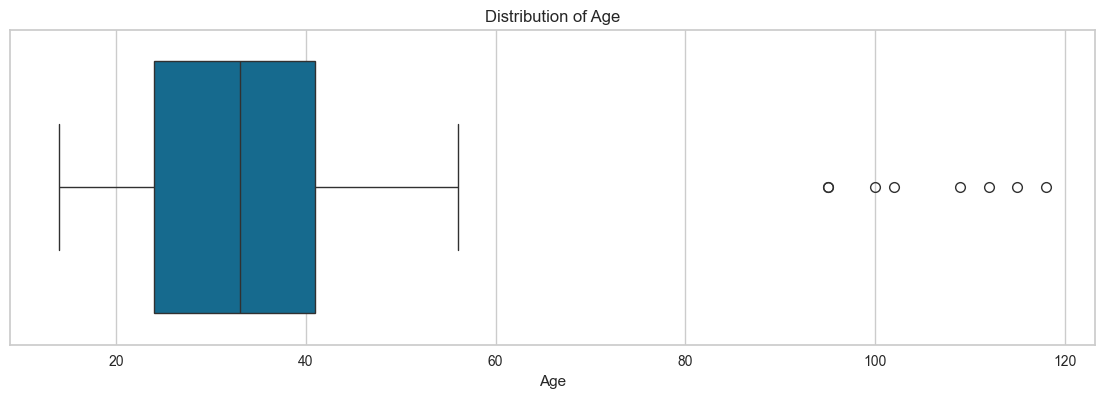

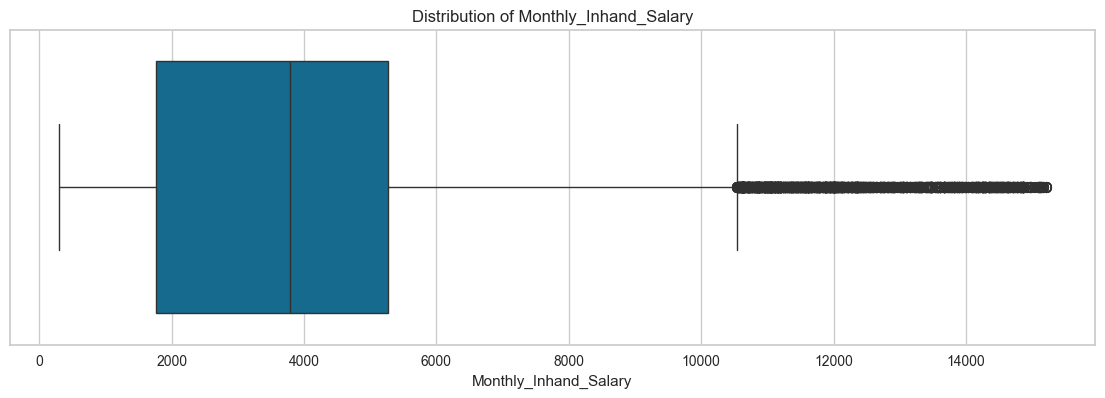

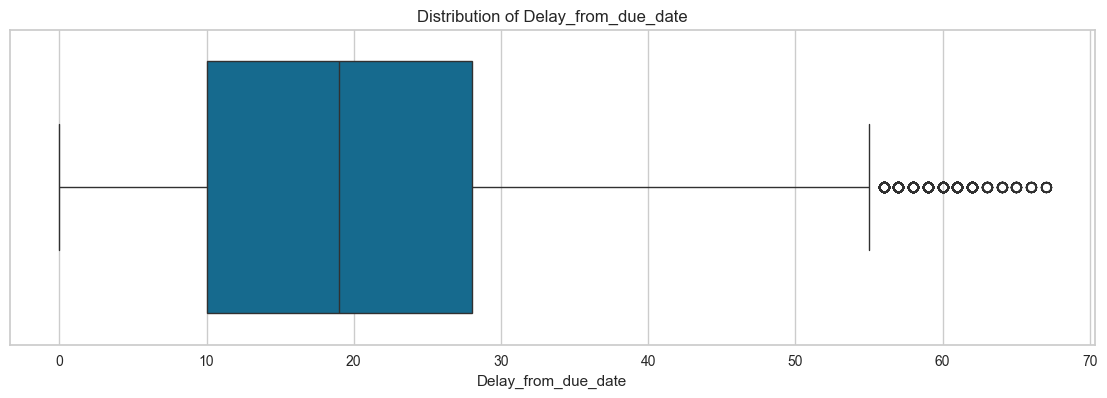

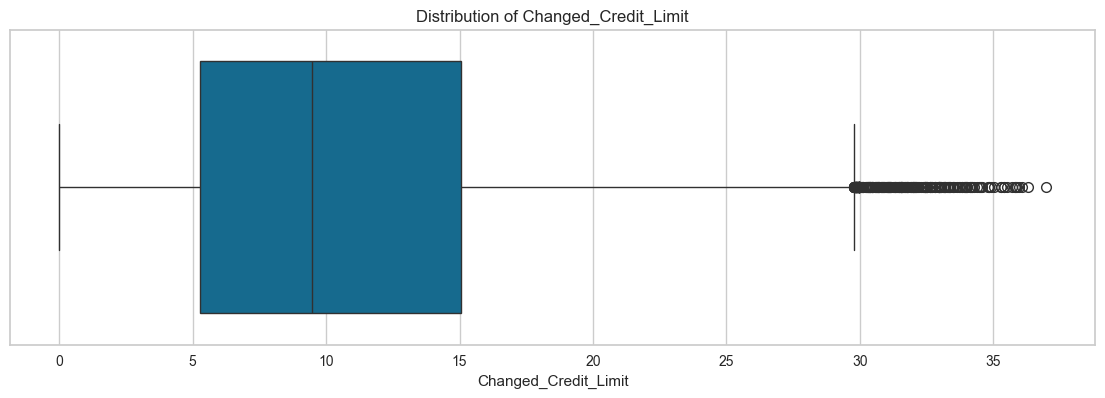

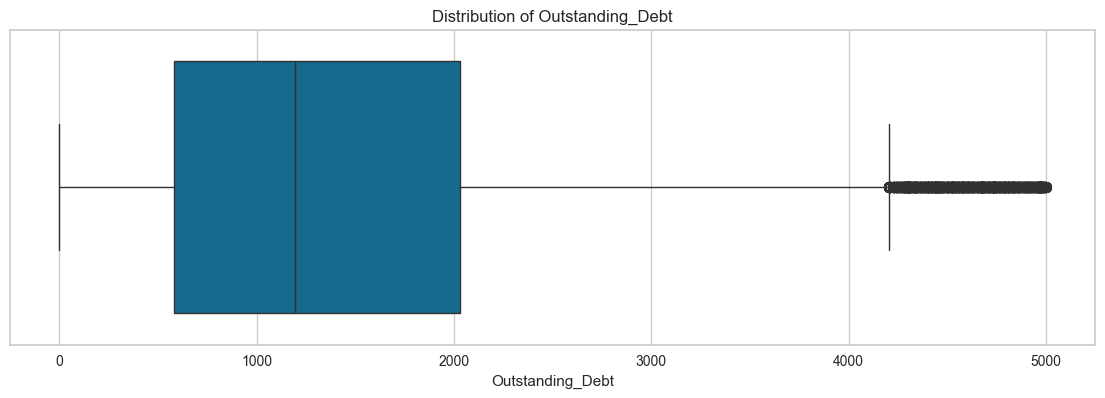

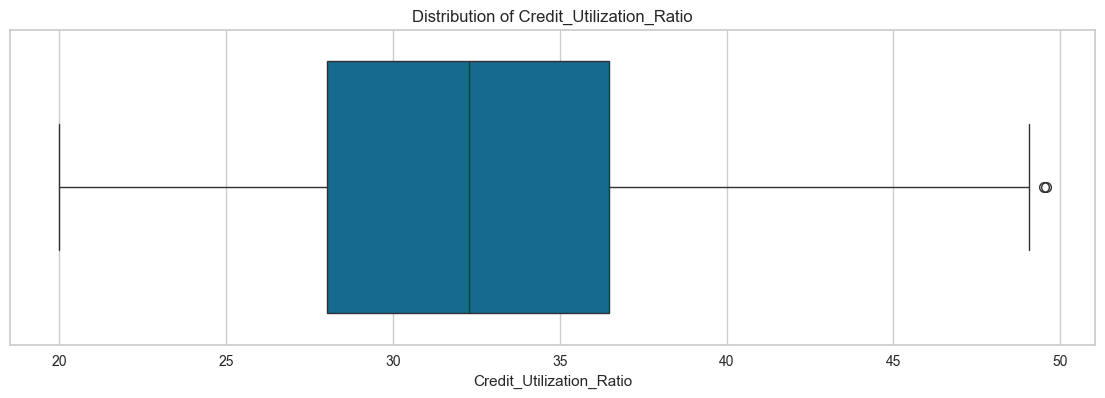

In [1246]:
column =['Age','Monthly_Inhand_Salary','Delay_from_due_date','Changed_Credit_Limit','Outstanding_Debt', 'Credit_Utilization_Ratio']
for corl in column:
    plt.figure(figsize=(14,9))
    plt.subplot(2,1,1)
    sns.boxplot(x=data_training[corl])
    plt.title((f'Distribution of {corl}'))
    
    #plt.subplot(2,1,2)
    #sns.distplot(x=data_training["Monthly_Inhand_Salary"])

In [1247]:
# Remove outliers using z-score
numerical_columns = data_training.select_dtypes(exclude='object')
from scipy import stats
data_training = data_training[(np.abs(stats.zscore(numerical_columns)) < 3).all(axis=1)]
data_training.shape

(64213, 30)

# EDA

- **Age Distribution**

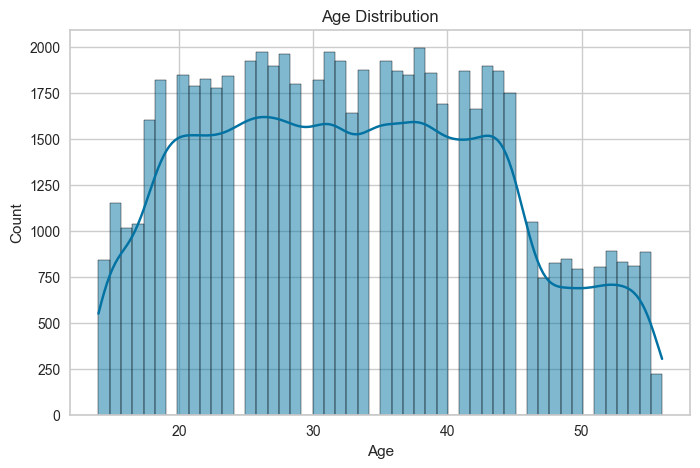

In [1248]:
# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(data_training['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


- **Annual Income**

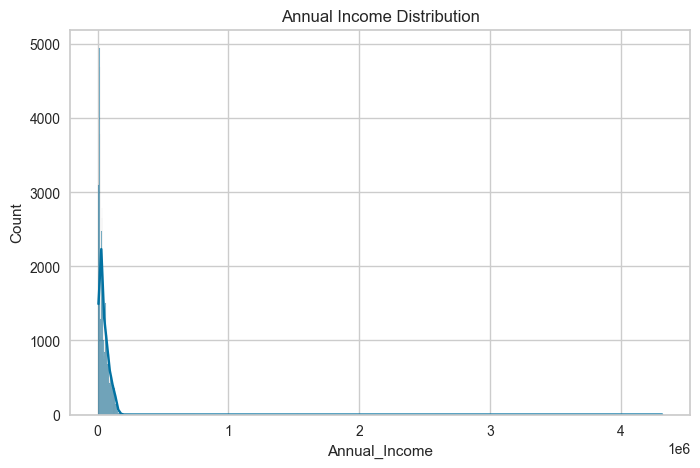

In [1249]:
# Annual Income
plt.figure(figsize=(8, 5))
sns.histplot(data_training['Annual_Income'], kde=True)
plt.title('Annual Income Distribution')
plt.show()

- **Occupation frequency**

C:\Users\ismai\AppData\Local\Temp\ipykernel_14952\1000096794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Occupation', data=data_training, order=data_training['Occupation'].value_counts().index, palette='bright')


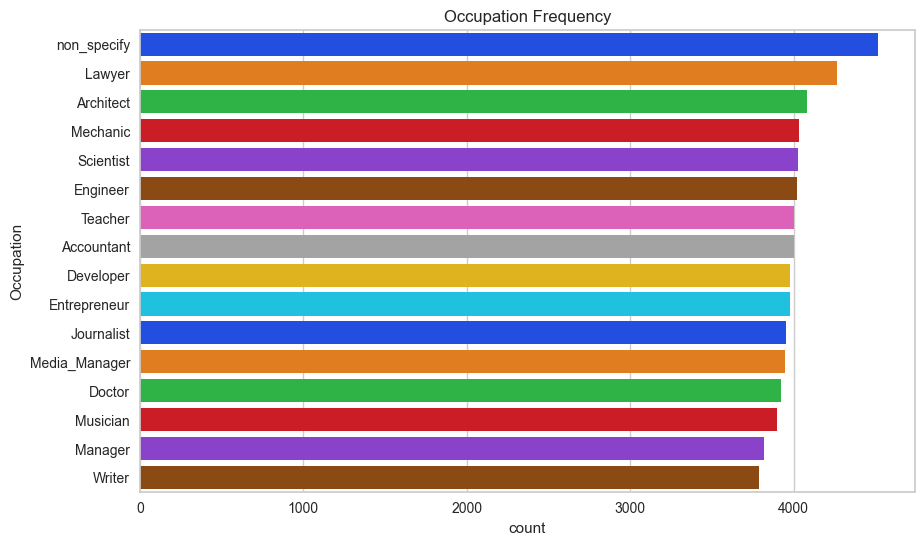

In [1250]:
# Occupation frequency
plt.figure(figsize=(10, 6))
sns.countplot(y='Occupation', data=data_training, order=data_training['Occupation'].value_counts().index, palette='bright')
plt.title('Occupation Frequency')
plt.show()

- **Credit Score**

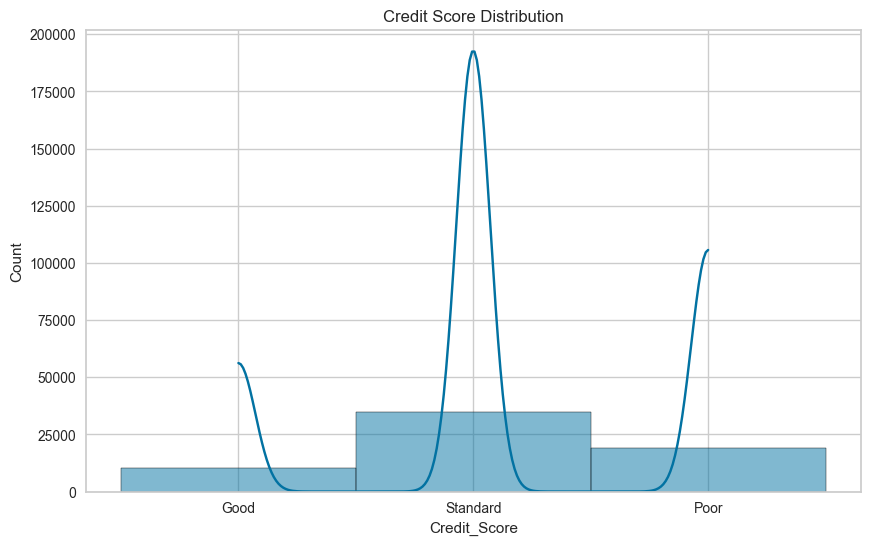

In [1251]:

# Credit_Score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_training['Credit_Score'], kde=True,)
plt.title('Credit Score Distribution')
plt.show()


- **Payment Behaviour**

C:\Users\ismai\AppData\Local\Temp\ipykernel_14952\4160402815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Payment_Behaviour', data=data_training, order=data_training['Payment_Behaviour'].value_counts().index, palette="Paired")


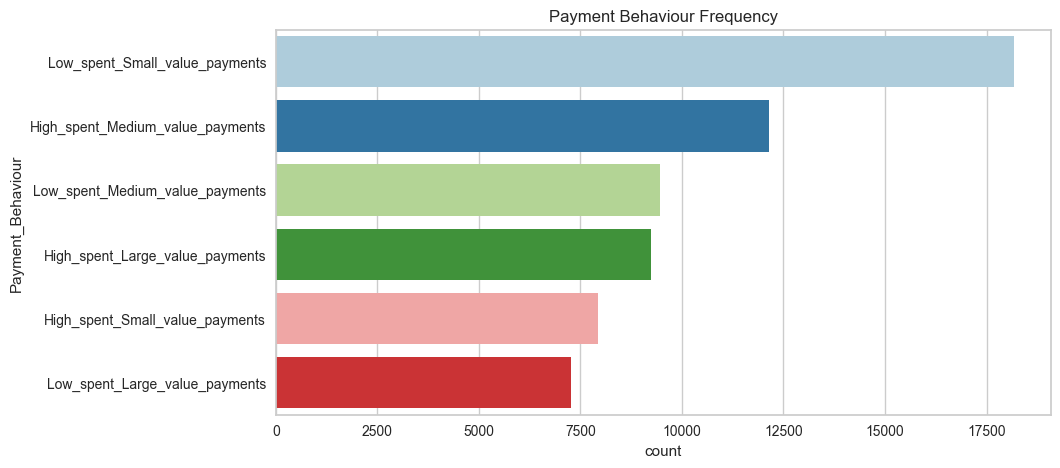

In [1252]:
# Payment Behaviour frequency
plt.figure(figsize=(10, 5))
sns.countplot(y='Payment_Behaviour', data=data_training, order=data_training['Payment_Behaviour'].value_counts().index, palette="Paired")
plt.title('Payment Behaviour Frequency')
plt.show()

- **Loan Specified **

C:\Users\ismai\AppData\Local\Temp\ipykernel_14952\3321221926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Specified', data=data_training, palette='Set2')


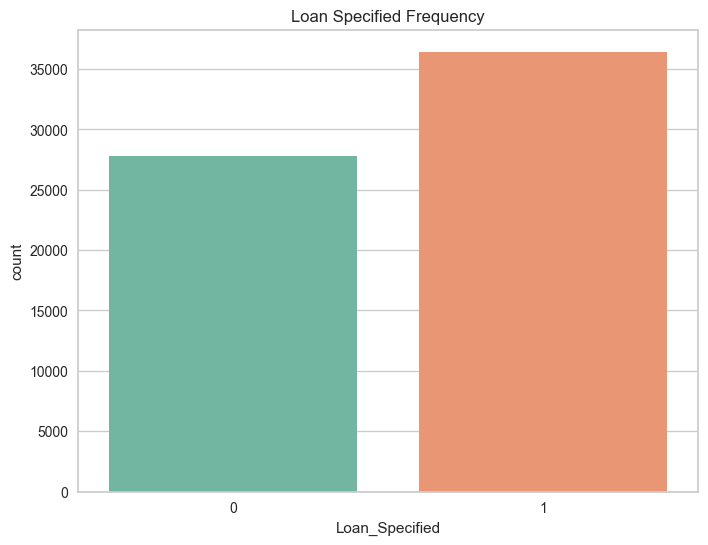

In [1253]:
# Frequency of Loan_Specified
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Specified', data=data_training, palette='Set2')
plt.title('Loan Specified Frequency')
plt.show()

# Data Preprocessing

In [1254]:
data_training.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Loan_Specified,credit_history_by_months
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,265
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,4267.133667,3,...,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,1,268
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,1,269
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,1,271
7,0x1609,CUS_0xd40,August,Langep,23.0,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,23.933795,17 Years and 11 Months,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,1,215


Since we won't need the columns ['ID', 'Customer_ID', 'Name', 'SSN'] for building our model, we will remove them from the training data.

In [1255]:
# drop columns for training data
data_training = data_training.drop(['ID', 'Customer_ID','Name','SSN','Credit_History_Age'],axis=1)

In [1256]:
# drop columns for testing data
data_testing = data_testing.drop(['ID', 'Customer_ID','Name','SSN','Credit_History_Age'],axis=1)

In [1257]:
# check object column
data_training.select_dtypes(include="object").head()

,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",non_specify,No,High_spent_Small_value_payments,Good
3,April,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good
6,July,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
7,August,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Standard


we have 7 column that should be coded 

we start with the  **Month**

In [1258]:
# Dictionary to map month names to numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 
    'June': 6, 'July': 7, 'August': 8, 'September': 9, 
    'October': 10, 'November': 11, 'December': 12
}

# Apply the mapping
data_training['Month'] = data_training['Month'].map(month_mapping)

In [1259]:
#for the testing data
# Dictionary to map month names to numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 
    'June': 6, 'July': 7, 'August': 8, 'September': 9, 
    'October': 10, 'November': 11, 'December': 12
}

# Apply the mapping
data_testing['Month'] = data_testing['Month'].map(month_mapping)

**Occupation**
we use LableEncoder

In [1260]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_training['Occupation'] = encoder.fit_transform( data_training['Occupation'])

# for testing data
data_testing['Occupation'] = encoder.fit_transform(data_testing['Occupation'])

**Type_of_Loan**

Since each entry can have multiple loan types, we should convert this multi-label data into a more usable format for machine learning algorithms.

In [1261]:
def Transform_Multi_Label_Data(df, column):
    # Ensure the column exists in the dataframe
    if column not in df.columns:
        raise ValueError(f"Column {column} does not exist in the DataFrame")
    
    # Normalize the data
    df[column] = df[column].str.split(', ')

    # Remove 'Not Specified' from the loan types
    df[column] = df[column].apply(lambda x: [loan for loan in x if loan != 'Not Specified'] if isinstance(x, list) else [])
    
    # Initialize MultiLabelBinarizer
    mlb = MultiLabelBinarizer()

    # One-hot encode the loan types
    one_hot_encoded_loans = mlb.fit_transform(df[column])
    
    # Create a DataFrame with the one-hot encoded loan types
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded_loans, columns=mlb.classes_, index=df.index)

    # Concatenate the original DataFrame with the one-hot encoded DataFrame
    df = pd.concat([df, one_hot_encoded_df], axis=1)
    
    # Drop the original 'Type_of_Loan' column
    df.drop(column, axis=1, inplace=True)

    return df

In [1262]:
# use the function for the training data
data_training = Transform_Multi_Label_Data(data_training,'Type_of_Loan')

# use the function for the testing data
data_testing = Transform_Multi_Label_Data(data_testing,'Type_of_Loan')

In [1263]:
data_training.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Student Loan,and Auto Loan,and Credit-Builder Loan,and Debt Consolidation Loan,and Home Equity Loan,and Mortgage Loan,and Not Specified,and Payday Loan,and Personal Loan,and Student Loan
0,1,23.0,12,19114.12,1824.843333,3,4,3,4.0,3,...,0,0,0,0,1,0,0,0,0,0
3,4,23.0,12,19114.12,4267.133667,3,4,3,4.0,5,...,0,0,0,0,1,0,0,0,0,0
4,5,23.0,12,19114.12,1824.843333,3,4,3,4.0,6,...,0,0,0,0,1,0,0,0,0,0
6,7,23.0,12,19114.12,1824.843333,3,4,3,4.0,3,...,0,0,0,0,1,0,0,0,0,0
7,8,23.0,12,19114.12,1824.843333,3,4,3,4.0,3,...,0,0,0,0,1,0,0,0,0,0


**Credit_Mix** , **Payment_of_Min_Amount** , **Credit_Score**

In [1264]:
# we going to use LabelEncoder for this columns
label_columns = ['Credit_Mix' ,'Payment_of_Min_Amount' , 'Credit_Score']
for lab in label_columns:
    data_training[lab] = encoder.fit_transform(data_training[lab])

In [1265]:
# for testing data
test_label_columns = ['Credit_Mix' ,'Payment_of_Min_Amount']
for lab_test in test_label_columns:
    data_testing[lab_test] = encoder.fit_transform(data_testing[lab_test])

**Payment_Behaviour**

In [1268]:
def one_hot(df, column):
    # Ensure the column exists in the dataframe
    if column not in df.columns:
        raise ValueError(f"Column {column} does not exist in the DataFrame")
    
    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False)
    
    # Fit and transform the column
    one_hot_encoded = encoder.fit_transform(df[[column]])
    
    # Create a DataFrame with the one-hot encoded columns
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([column]), index=df.index)
    
    # Concatenate the original DataFrame with the one-hot encoded DataFrame
    df = pd.concat([df, one_hot_encoded_df], axis=1)
    
    # Drop the original column
    df.drop(column, axis=1, inplace=True)

    return df

In [1270]:
data_training = one_hot(data_training,'Payment_Behaviour')
data_testing = one_hot(data_testing,'Payment_Behaviour')

#### **correlation matrix only for features has threshold abov 0.1**

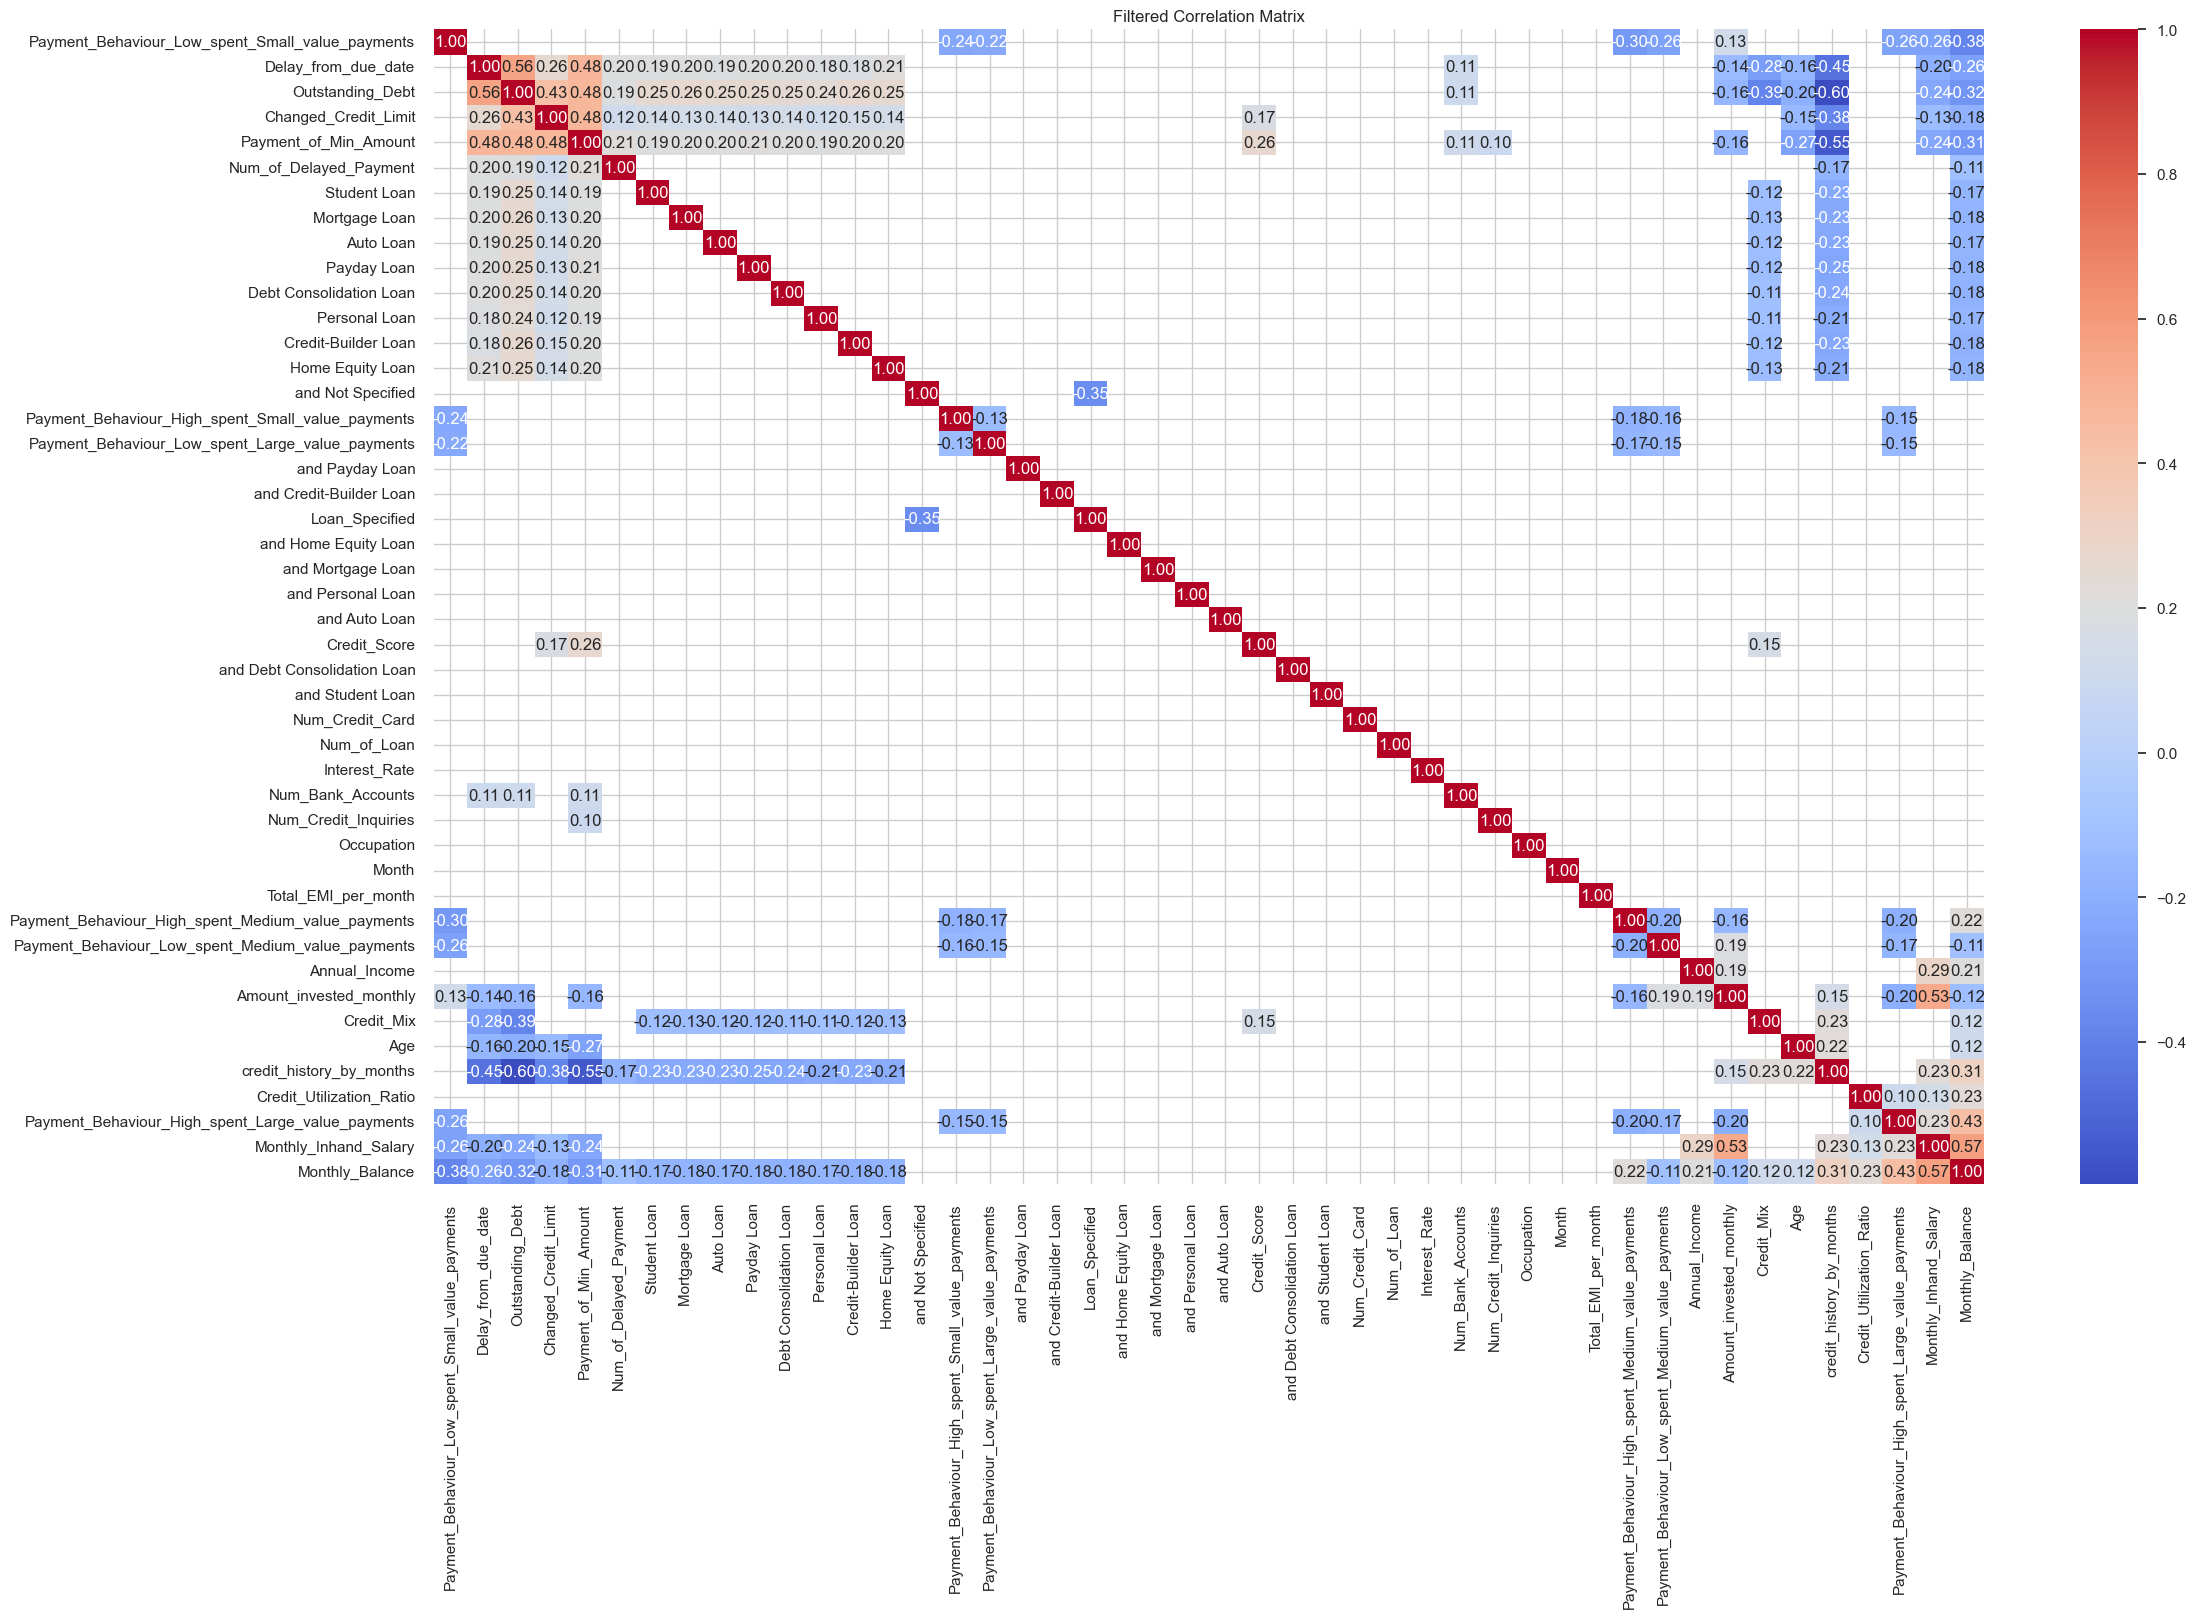

In [1330]:
# Compute the correlation matrix
corr_matrix = data_training.corr()

# Use hierarchical clustering to reorder the correlation matrix
corr_linkage = linkage(corr_matrix, method='average')
dendro = dendrogram(corr_linkage, labels=corr_matrix.columns, no_plot=True)
ordered_columns = dendro['ivl']
ordered_corr_matrix = corr_matrix.loc[ordered_columns, ordered_columns]

# Filter the correlations by a threshold
threshold = 0.1
filtered_corr_matrix = ordered_corr_matrix[ordered_corr_matrix.abs() > threshold]

# Create the heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(filtered_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=filtered_corr_matrix.isnull())
plt.title('Filtered Correlation Matrix')
plt.show()

# ALGORITHM

In [1338]:
# train test split

x = data_training.drop('Credit_Score',axis=1)
y = data_training['Credit_Score'].values

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=45)

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


**LogisticRegression**

In [ ]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test dataset
predictions = logistic_model.predict(X_test)

#calculat Accuaracy
acr = accuracy_score(y_test,predictions)
print(f'accuracy_score for logistic algorithm : {acr}')

#### - Feature Scaling